In [1]:
using ApproxFun
using LinearAlgebra
using Plots

In [40]:
dx=(0..1)

0..1

In [41]:
dt=(0..1)

0..1

In [42]:
domain=dx×dt

0..1 x 0..1

In [44]:
∂x=Derivative(domain,[1,0])

DerivativeWrapper : Chebyshev(0..1)⊗Chebyshev(0..1) → Ultraspherical(1,0..1)⊗Chebyshev(0..1)
 0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋯
 0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
  ⋮    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱   ⋱

In [45]:
∂t=Derivative(domain,[0,1])

DerivativeWrapper : Chebyshev(0..1)⊗Chebyshev(0..1) → Chebyshev(0..1)⊗Ultraspherical(1,0..1)
 0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋯
 0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ⋱
  ⋮    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱    ⋱   ⋱

In [46]:
⊠=[∂t^2-∂x^2 0 0 0;
    0 ∂t^2-∂x^2 0 0;
    0 0 ∂t^2-∂x^2 0;
    0 0 0 ∂t^2-∂x^2]

InterlaceOperator : 4-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)] → 4-element ArraySpace:
TensorSpace{Tuple{Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64},Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Ultraspherical(2,0..1)⊗Ultraspherical(2,0..1), Ultraspherical(2,0..1)⊗Ultraspherical(2,0..1), Ultraspherical(2,0..1)⊗Ultraspherical(2,0..1), Ultraspherical(2,0..1)⊗Ultraspherical(2,0..1)]
 0.0  0.0  0.0  0.0 

In [47]:
Bdy_V=[I⊗ldirichlet(dt);I⊗lneumann(dt);lneumann(dx)⊗I;rneumann(dx)⊗I]

InterlaceOperator : Chebyshev(0..1)⊗Chebyshev(0..1) → 4-element ArraySpace:
TensorSpace{SV,D,Float64} where D where SV[Chebyshev(0..1)⊗ConstantSpace(Point(0)), Chebyshev(0..1)⊗ConstantSpace(Point(0)), ConstantSpace(Point(0))⊗Chebyshev(0..1), ConstantSpace(Point(1))⊗Chebyshev(0..1)]
 1.0  -1.0  0.0   1.0   0.0   0.0  -1.0   0.0   0.0   0.0  ⋯
 0.0   2.0  0.0  -8.0   0.0   0.0  18.0   0.0   0.0   0.0  ⋱
 0.0   0.0  2.0   0.0   0.0  -8.0   0.0   0.0   0.0  18.0  ⋱
 0.0   0.0  2.0   0.0   0.0   8.0   0.0   0.0   0.0  18.0  ⋱
 0.0   0.0  1.0   0.0  -1.0   0.0   0.0   1.0   0.0   0.0  ⋱
 0.0   0.0  0.0   0.0   2.0   0.0   0.0  -8.0   0.0   0.0  ⋱
 0.0   0.0  0.0   0.0   2.0   0.0   0.0   0.0  -8.0   0.0  ⋱
 0.0   0.0  0.0   0.0   2.0   0.0   0.0   0.0   8.0   0.0  ⋱
 0.0   0.0  0.0   0.0   0.0   1.0   0.0   0.0  -1.0   0.0  ⋱
 0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0  ⋱
  ⋮     ⋱    ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱     ⋱   ⋱

In [48]:
Bdy_A=[I⊗ldirichlet(dt);I⊗lneumann(dt);ldirichlet(dx)⊗I;rdirichlet(dx)⊗I]

InterlaceOperator : Chebyshev(0..1)⊗Chebyshev(0..1) → 4-element ArraySpace:
TensorSpace{SV,D,Float64} where D where SV[Chebyshev(0..1)⊗ConstantSpace(Point(0)), Chebyshev(0..1)⊗ConstantSpace(Point(0)), ConstantSpace(Point(0))⊗Chebyshev(0..1), ConstantSpace(Point(1))⊗Chebyshev(0..1)]
 1.0  -1.0   0.0   1.0   0.0  0.0  -1.0   0.0   0.0   0.0  ⋯
 0.0   2.0   0.0  -8.0   0.0  0.0  18.0   0.0   0.0   0.0  ⋱
 1.0   0.0  -1.0   0.0   0.0  1.0   0.0   0.0   0.0  -1.0  ⋱
 1.0   0.0   1.0   0.0   0.0  1.0   0.0   0.0   0.0   1.0  ⋱
 0.0   0.0   1.0   0.0  -1.0  0.0   0.0   1.0   0.0   0.0  ⋱
 0.0   0.0   0.0   0.0   2.0  0.0   0.0  -8.0   0.0   0.0  ⋱
 0.0   1.0   0.0   0.0  -1.0  0.0   0.0   0.0   1.0   0.0  ⋱
 0.0   1.0   0.0   0.0   1.0  0.0   0.0   0.0   1.0   0.0  ⋱
 0.0   0.0   0.0   0.0   0.0  1.0   0.0   0.0  -1.0   0.0  ⋱
 0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   2.0   0.0  ⋱
  ⋮     ⋱     ⋱     ⋱     ⋱    ⋱     ⋱     ⋱     ⋱     ⋱   ⋱

In [49]:
Bdy_op=[Bdy_V 0 0 0; 
        0 Bdy_A 0 0; 
        0 0 Bdy_A 0; 
        0 0 0 Bdy_A]

InterlaceOperator : 4-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)] → 4-element ArraySpace:
ApproxFunBase.ArraySpace{TensorSpace{SV,D,Float64} where D where SV,1,DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},DomainSets.Point{Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[4-element ArraySpace:
TensorSpace{SV,D,Float64} where D where SV[Chebyshev(0..1)⊗ConstantSpace(Point(0)), Chebyshev(0..1)⊗ConstantSpace(Point(0)), ConstantSpace(Point(0))⊗Chebyshev(0..1), ConstantSpace(Point(1))⊗Chebyshev(0..1)], 4-element ArraySpace:
TensorSpace{SV,D,Float64} where D whe

In [50]:
Guage_op=[∂t ∂x 0 0]

InterlaceOperator : 4-element ArraySpace:
Space[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), UnsetSpace(), UnsetSpace()] → 1-element ArraySpace:
TensorSpace{Tuple{Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64},Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Ultraspherical(1,0..1)⊗Ultraspherical(1,0..1)]


In [55]:
α=π^2

9.869604401089358

In [56]:
k=3 #Selects mode

3

In [57]:
Bdy_ans_V=[Fun(a->-(1-(1/(k*π)^2)*α)*cos(k*π*a),dx);0;0;0]

Fun(4-element ArraySpace:
Space[Chebyshev(0..1), ConstantSpace, ConstantSpace, ConstantSpace],[-4.0766e-17, 0.0, 0.0, 0.0, 0.500725, -5.75289e-17, 0.721523, 1.28611e-16, -0.396467, -8.76501e-17  …  -1.34912e-16, 1.98353e-14, 8.22588e-17, -1.76942e-16, 8.81626e-17, 5.55112e-17, 8.85765e-18, -1.38778e-17, -2.43011e-17, 5.20417e-17])

In [58]:
Bdy_ans_A=[0;Fun(a->-k*π*sin(k*π*a),dx);0;0]

Fun(4-element ArraySpace:
Space[ConstantSpace, Chebyshev(0..1), ConstantSpace, ConstantSpace],[0.0, -2.50565, 0.0, 0.0, -3.65101e-17, -2.75803, -1.89799e-15, 6.98253, 1.55318e-15, -1.93798  …  -2.03326e-12, -8.13921e-16, 1.89154e-14, -1.27433e-16, 2.22045e-16, 8.45923e-16, 4.44089e-16, 5.72258e-16, -5.55112e-17, -5.1182e-16])

In [59]:
ρ=Fun((a,b)->α*cos(k*π*a)*cos(k*π*b), domain)

Fun(Chebyshev(0..1)⊗Chebyshev(0..1),[2.13634e-17, -8.61264e-17, -2.02625e-16, 7.45756e-18, 3.13187, 6.57417e-18, -5.74176e-17, -3.70111e-16, 3.92791e-18, -3.62036e-16  …  2.6028e-17, -1.55539e-15, 9.54197e-19, -7.50845e-15, -7.1961e-18, -2.15111e-14, -2.21001e-17, -3.57585e-14, 5.94216e-18, -3.57533e-14])

In [60]:
J1=Fun((a,b)->α*sin(k*π*a)*sin(k*π*b), domain)

Fun(Chebyshev(0..1)⊗Chebyshev(0..1),[0.697584, 5.41041e-17, -1.37294e-16, 0.767849, -2.42516e-17, 0.767849, 1.2797e-16, -2.14138e-16, 2.47886e-17, 8.997e-17  …  2.75242e-17, 3.73972e-15, 2.36349e-17, 1.36939e-14, 8.14171e-18, 2.95267e-14, 9.48111e-18, 3.80067e-14, 3.11608e-17, 2.95681e-14])

In [61]:
@time Av0=\([⊠,Guage_op,Bdy_op],[[ρ,J1,0,0],[0],[Bdy_ans_V,Bdy_ans_A,Bdy_ans_A,Bdy_ans_A]],tolerance=1e-4)

  8.769728 seconds (8.28 M allocations: 587.971 MiB, 5.07% gc time)


Fun(4-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)],[8.88293e-16, -0.0471497, -0.0706801, -0.0706801, 8.09473e-17, -0.0392075, 0.0392075, 4.95574e-16, 1.14246e-15, -1.47897e-16  …  4.50757e-18, 1.31763e-19, 2.6003e-18, 7.55569e-19, -1.09251e-18, -8.00279e-18, -9.68022e-19, -2.65559e-17, 3.29293e-18, -5.02036e-17])

In [62]:
@time av0=\([⊠,Bdy_op],[[0,0,0,0],[[Fun(a->-cos(k*π*a),dx);0;0;0],Bdy_ans_A,Bdy_ans_A,Bdy_ans_A]],tolerance=1e-4)

  3.372901 seconds (5.54 M allocations: 348.966 MiB, 1.93% gc time)


Fun(4-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)],[1.51432e-15, -0.0706801, -0.0706801, -0.0706801, 2.21953e-16, 1.8735e-15, 1.28517e-15, -2.54456e-16, 2.99639e-15, 6.9984e-16  …  -1.45076e-17, -4.17238e-19, -4.80059e-18, -1.71633e-18, -2.12912e-18, 7.74096e-19, -2.80112e-18, 1.43946e-18, -3.4604e-18, -7.63267e-19])

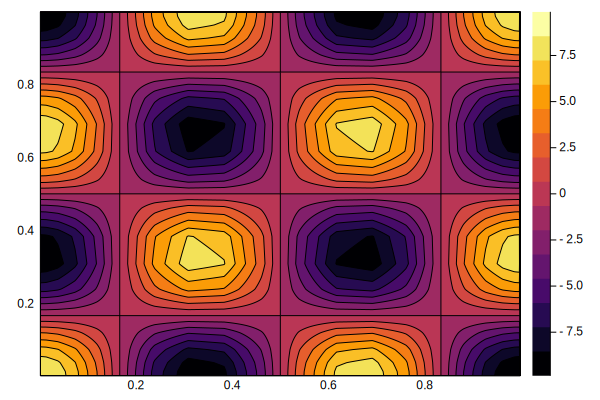

In [19]:
contourf(ρ)

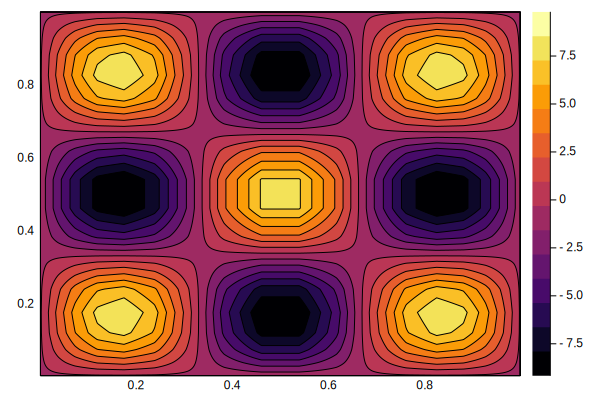

In [20]:
contourf(J1)

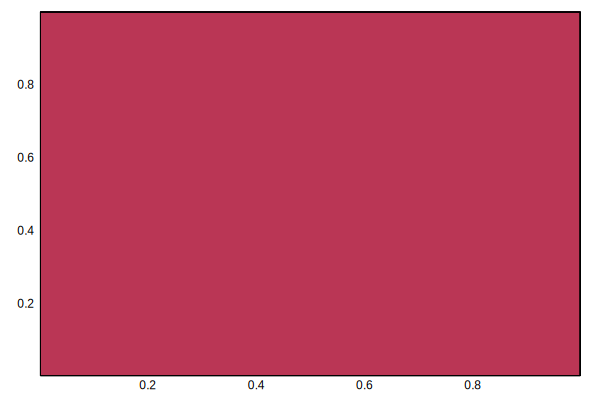

In [21]:
contourf(∂t*Av0[1]+∂x*Av0[2])

In [ ]:
contourf(Av0[1])

In [ ]:
contourf(Fun((a,b)->((1-10*α/(k*π)^2)*cos(k*π*b)-(5*α*b/(k*π))*sin(k*π*b))*cos(k*π*a),domain))

In [ ]:
contourf(av0[1])

In [ ]:
contourf(Fun((a,b)->cos(k*π*b)*cos(k*π*a),domain))

In [ ]:
contourf(Av0[2])

In [ ]:
contourf(Fun((a,b)->((1-5*α/(k*π)^2)*sin(k*π*b)+(5*α*b/(k*π)*cos(k*π*b))*sin(k*π*a),domain))

In [ ]:
contourf(av0[2])

In [ ]:
contourf(Fun((a,b)->sin(k*π*b)*sin(k*π*a),domain))

In [ ]:
contourf(Av0[3])

In [ ]:
contourf(av0[3])

In [ ]:
contourf(Av0[4])

In [ ]:
contourf(av0[4])

In [22]:
γ0∇ = [∂t  ∂x  0   0   0   0   0   0;
       ∂x  ∂t  0   0   0   0   0   0;
       0   0   ∂t  0   0   0   ∂x  0;
       0   0   0   ∂t  0   -∂x 0   0;
       0   0   0   0   ∂t  0   0   ∂x;
       0   0   0   -∂x 0   ∂t  0   0;
       0   0   ∂x  0   0   0   ∂t  0;
       0   0   0   0   ∂x  0   0   ∂t]

InterlaceOperator : 8-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)] → 8-element ArraySpace:
TensorSpace{Tuple{Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64},Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Ultraspherical(1,0..1)⊗Ultraspherical(1,0..1), Ultraspherical(1,0..1)⊗Ultras

In [23]:
∇γ0=  [∂t  -∂x  0   0   0   0   0   0;
       -∂x  ∂t  0   0   0   0   0   0;
       0    0   ∂t  0   0   0   -∂x 0;
       0    0   0   ∂t  0   ∂x  0   0;
       0    0   0   0   ∂t  0   0   -∂x;
       0    0   0   ∂x  0   ∂t  0   0;
       0    0   -∂x 0   0   0   ∂t  0;
       0    0   0   0   -∂x 0   0   ∂t]

InterlaceOperator : 8-element ArraySpace:
TensorSpace{Tuple{Chebyshev{Interval{:closed,:closed,Int64},Float64},Chebyshev{Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1), Chebyshev(0..1)⊗Chebyshev(0..1)] → 8-element ArraySpace:
TensorSpace{Tuple{Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64},Ultraspherical{Int64,Interval{:closed,:closed,Int64},Float64}},DomainSets.ProductDomain{Tuple{Interval{:closed,:closed,Int64},Interval{:closed,:closed,Int64}},Tuple{Int64,Int64},StaticArrays.SArray{Tuple{2},Int64,1,2}},Float64}[Ultraspherical(1,0..1)⊗Ultraspherical(1,0..1), Ultraspherical(1,0..1)⊗Ultras

In [ ]:
γ0A=[Av0[1];-Av0[2];-Av0[3];-Av0[4];0;0;0;0]

In [ ]:
F=(∇γ0)*(γ0A)

In [ ]:
γ0a=[av0[1];-av0[2];-av0[3];-av0[4];0;0;0;0]

In [ ]:
f=(∇γ0)*(γ0a)

In [ ]:
contourf(F[1])

In [ ]:
contourf(f[1])

In [ ]:
contourf(F[2])

In [ ]:
contourf(f[2])

In [ ]:
contourf(F[3])

In [ ]:
contourf(f[3])

In [ ]:
contourf(F[4])

In [ ]:
contourf(f[4])

In [ ]:
contourf(F[5])

In [ ]:
contourf(f[5])

In [ ]:
contourf(F[6])

In [ ]:
contourf(f[6])

In [ ]:
contourf(F[7])

In [ ]:
contourf(f[7])

In [ ]:
contourf(F[8])

In [ ]:
contourf(f[8])

In [ ]:
diFFF=(γ0∇)*F-[ρ;-J1;0;0;0;0;0;0]

In [ ]:
difff=(γ0∇)*f

In [ ]:
l=length(diFFF)
TOT= 0
for i=1:l
    TOT+=diFFF[i]*diFFF[i]
    display(i)
end

In [ ]:
DefiniteIntegral(Chebyshev(0..1)⊗Chebyshev(0..1))*TOT

In [ ]:
l=length(difff)
tot= 0
for i=1:l
    tot+=difff[i]*difff[i]
    display(i)
end

In [ ]:
DefiniteIntegral(Chebyshev(0..1)⊗Chebyshev(0..1))*tot